In [1]:
import pandas
pandas.__version__

'0.23.4'

Query interface on the web: 

https://www.bmreports.com/bmrs/?q=demand/rollingsystemdemand

Preview the CSV

In [2]:
!head RollingSystemDemand_20180901_0129.csv

HDR,ROLLING SYSTEM DEMAND
VD,20180601000000,25152
VD,20180601000500,25231
VD,20180601001000,25070
VD,20180601001500,25019
VD,20180601002000,24943
VD,20180601002500,24727
VD,20180601003000,24716
VD,20180601003500,24815
VD,20180601004000,24877


load CSV into Pandas using the default options

In [3]:
dframe = pandas.read_csv("RollingSystemDemand_20180901_0129.csv")
dframe.head()

,HDR,ROLLING SYSTEM DEMAND
VD,20180601000000,25152.0
VD,20180601000500,25231.0
VD,20180601001000,25070.0
VD,20180601001500,25019.0
VD,20180601002000,24943.0


I don't like that Pandas is treating "VD" as the index, so I'm going to force the index to be numeric

In [4]:
#dataframe.reset_index() # not sure why this didn't work
dframe.index=range(len(dframe))
dframe.head()

,HDR,ROLLING SYSTEM DEMAND
0,20180601000000,25152.0
1,20180601000500,25231.0
2,20180601001000,25070.0
3,20180601001500,25019.0
4,20180601002000,24943.0


I don't like the column names, so I'm going to change those

In [5]:
dframe.columns=['time of measurement','demand level']

In [6]:
dframe.head()

,time of measurement,demand level
0,20180601000000,25152.0
1,20180601000500,25231.0
2,20180601001000,25070.0
3,20180601001500,25019.0
4,20180601002000,24943.0


I'm happy. Let's see what the plot looks like

In [7]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.__version__

'2.2.3'

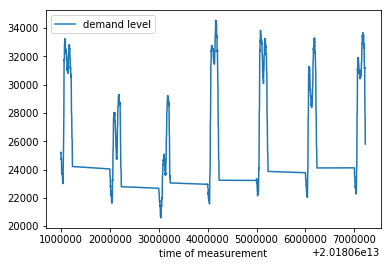

In [8]:
dframe.plot(x='time of measurement', y='demand level')
plt.show()

Hmm, those flat lines look unlikely. Also, the time axis needs some work. Switch to scatter plot

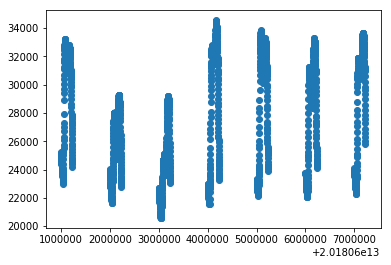

In [9]:
plt.scatter(dframe['time of measurement'], dframe['demand level'])
plt.show()

Switching to scatter plot confirms the lines are not actual data points. 

Also, need to convert 'time of measurement' column to datetime

In [10]:
from datetime import datetime

Before trying to force the column to a datetime, let's experiment with a single entry to confirm the method.

strptime = "string parse time"<BR>
strftime = "string format time"

In [11]:
# see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior for details

# using the first entry from the output of !head above 
datetime_object = datetime.strptime('20180601000000', '%Y%m%d%H%M%S')
datetime_object.strftime('%Y-%m-%d %H:%M:%S') # print the result in a human readable format

'2018-06-01 00:00:00'

Conclusion: looks like the method works

Next, convert the entire column using that format

In [12]:
dframe['time of measurement'] = pandas.to_datetime(dframe['time of measurement'],format='%Y%m%d%H%M%S')

ValueError: time data 2000 does not match format '%Y%m%d%H%M%S' (match)

That manual copy-pasted burned me again. Turns out I was making an assumption that the data type was string

Look at the type of the columns:

In [ ]:
dframe.dtypes

Before converting the time column to datetime, first convert to string

In [ ]:
dframe['time of measurement']=dframe['time of measurement'].to_string()

In [ ]:
dframe['time of measurement'] = pandas.to_datetime(dframe['time of measurement'],format='%Y%m%d%H%M%S')

Hmm, something went wrong...

In [ ]:
dframe.head()